# Supervised Machine Learning by @attzulkafli.

## Classification : Decision Tree

Decision trees are widely used models for classification and regressions. Essentially, they learn a hierarchy of if/else questions, leading to an action.  

These questions are similar to the questions you might ask in a **game of 20 Questions**. Imagine you want to distinguish between the following four animals: 

**bears, hawks, penguins, and dolphins**.

<img src='../images/DecisionTree.png'>

Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is "yes", you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example, asking whether the animal has finns. This series of questions can be expressed as a decision tree.

Machine learning speaking, we want to build a model to distinguish between these four classes of animals using three features (has feathers, can fly, has fins). But instead of building these models by hand, we can learn them from data using supervised learning.

### Building decision trees

Usually, data does not come in the form of binary yes/no features, but is instead represented by continuous features. So, we expect the "questions" to be in "threshold"-like form, such as "Is feature *i* larger than value *a*?" To build a tree, the algorithm has to search over all possible conditions and finds the one that is most informative about the target variable.


**Predicting the target class or value of new data point:**

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the target class with the majority (or the single target in the case of *pure* leaves) in that region. The region can be found by traversing the tree from the root and going left or right depending on whether the test condition is fulfilled or not.

It is also possible to use decision trees for regression tasks, using exactly the same technique. To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into. The output for this data point is the mean target value of the training points in this leaf.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
X = dataset.drop('class', axis=1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))



Accuracy on training set: 0.982
Accuracy on test set: 0.895


Question: Find out what's the ideal depth level that we can strike a balance between fitting well to the training data, and generalizing well to test data.

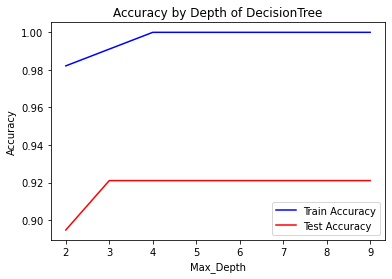

In [8]:
train_acc = []
test_acc = []

for i in range(2,10):
    tree1 = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree1.fit(X_train, y_train)

    train_acc.append(tree1.score(X_train, y_train))
    test_acc.append(tree1.score(X_test, y_test))
    
plt.plot(range (2,10),train_acc,'b-', label='Train Accuracy')
plt.plot(range (2,10),test_acc,'r-', label='Test Accuracy')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Depth of DecisionTree')
plt.show()

In [10]:
tree_3=DecisionTreeClassifier(max_depth=3, random_state=0)
tree_3.fit(X_train, y_train)

print('Accuracy of tree max_depth=3 on train set:  {}'.format(tree_3.score(X_train, y_train))  )
print('Accuracy of tree max_depth=3 on test set:  {}'.format(tree_3.score(X_test, y_test))  )

Accuracy of tree max_depth=3 on train set:  0.9910714285714286
Accuracy of tree max_depth=3 on test set:  0.9210526315789473
